# Exercise 1: Policy Evaluation

In [1]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
from typing import Tuple, List
import numpy as np
from ipywidgets import interact

from grid_world import GridWorld

In this exercise we will be using a `GridWorld` environment where there are a set of absorbing states that get a reward of 0 and for every other state visited gets a reward of -1. The actions are to go up, down, left, or right, respecting the boundaries of the grid. We can visualize the grid below.

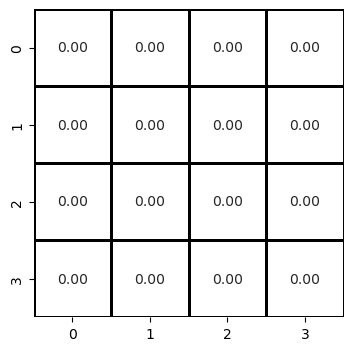

In [16]:
env = GridWorld(4, absorbing_states={(0,0), (3,3)})
env.render();

#### Exercise 1.1: Implement Policy Evaluation
First, implement the function `bellman_expectation` which will compute the one-step Bellman update of the value function for a given state and stochastic policy. Then, implement the function `policy_evaluation` to implement the policy evaluation algorithm using the `bellman_expectation` function.

In [25]:
def bellman_expectation(env: GridWorld, state: Tuple[int, int], policy_probs: List[float], discount: float) -> float:
        """
        Perform a one-step lookahead and applies the Bellman expectation equation to compute the update the value for
        the given state.
        
        Args:
            env: grid world environment
            state: the (x, y) indices that define the location in the grid
            policy_probs: transition probabilities for each action for the given state
            discount: discount factor
        Returns:
            the new value for the specified state
        """
        ##### YOUR CODE STARTS HERE #####
        # Hint: Use env.actions and env.state_value to get the action set 
        # and current environment value function
    
        ###### YOUR CODE END HERE ######

def policy_evaluation(env: GridWorld, policy: np.ndarray, steps: int=1, discount: float=1., in_place: bool=False):
    """
    Args:
        env: grid world environment
        policy: a numpy 3-D numpy array, where the first two dimensions identify a state and 
                the third dimension identifies the actions. The array stores the probability 
                of taking each action. I.e. policy[i, j, k] is the probability of selection action
                k from state (i,j).
        steps: the number of iterations of the algorithm
        discount: discount factor
        in_place: if False, the value table is updated after all the new values have been calculated.
             if True the state [i, j] will new already new values for the states [< i, < j]
    """
    env.reset() # reset before running
    state_value_history = [env.state_value]
    for k in range(steps):
        # cache old values if not in place
        values = env.state_value if in_place else np.empty_like(
            env.state_value)
        ##### YOUR CODE STARTS HERE #####
        # Update the `values` for each state
        
        ###### YOUR CODE END HERE ######
        # set the new value table
        env.state_value = values
        state_value_history.append(env.state_value)
    return state_value_history

Now, run the code below to run the policy evaluation algorithm on a simple grid world using a default random policy. Try playing around with a different discount factor to see how that effects the solution.

In [30]:
# Create GridWorld
env = GridWorld(4, absorbing_states={(0,0), (3,3)})

# Define random policy
policy = np.ones((*env.state_value.shape, len(env.actions))) * 0.25

# Run policy evaluation
num_steps = 10
discount = 1.0
state_value_history = policy_evaluation(env, policy, steps=num_steps, discount=discount, in_place=False)
@interact(i=(0, num_steps))
def f(i=0):
    env.render(state_value_history[i]);

interactive(children=(IntSlider(value=0, description='i', max=10), Output()), _dom_classes=('widget-interact',…

Try playing around with an even larger example world below.

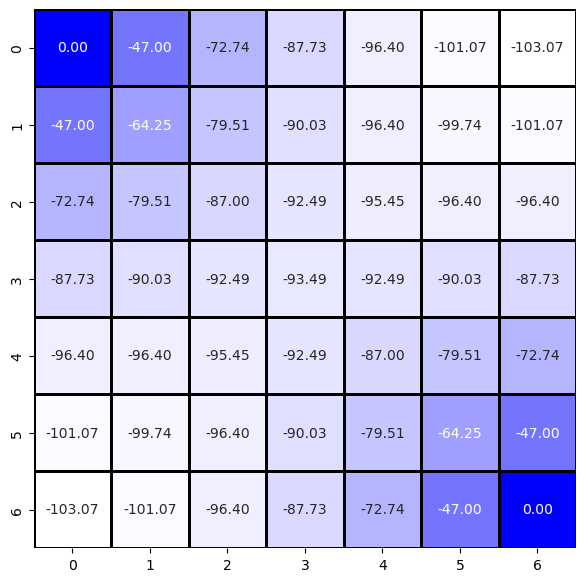

In [31]:
steps = 1000
env = GridWorld(7, absorbing_states={(0,0), (6,6)})
policy = np.ones((*env.state_value.shape, len(env.actions))) * 0.25
policy_evaluation(env, policy, steps=steps, discount=1., in_place=False)
env.render();